# Homework Linear Regression
The dataset you are working is Boston Housing Price

The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target.

For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff!

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: from sklearn.model_selection import train_test_split

Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model

Hint: from sklearn.metrics import r2_score

Hint: from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

print(boston.data)
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

bos.head(10)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Apply data normalization (Scaling) to improve the prediction result¶
Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

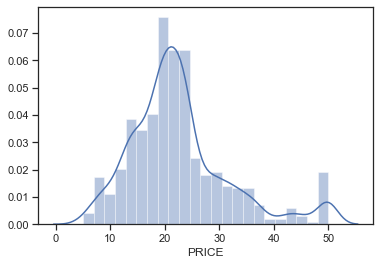

In [6]:
sns.distplot(bos['PRICE'])


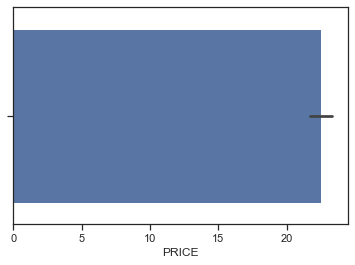

In [14]:
sns.barplot(bos['PRICE'])


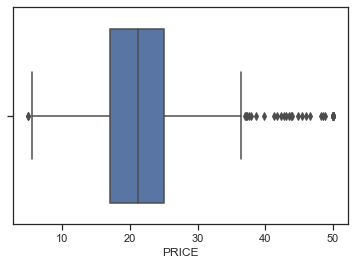

In [13]:
sns.boxplot(bos['PRICE'])


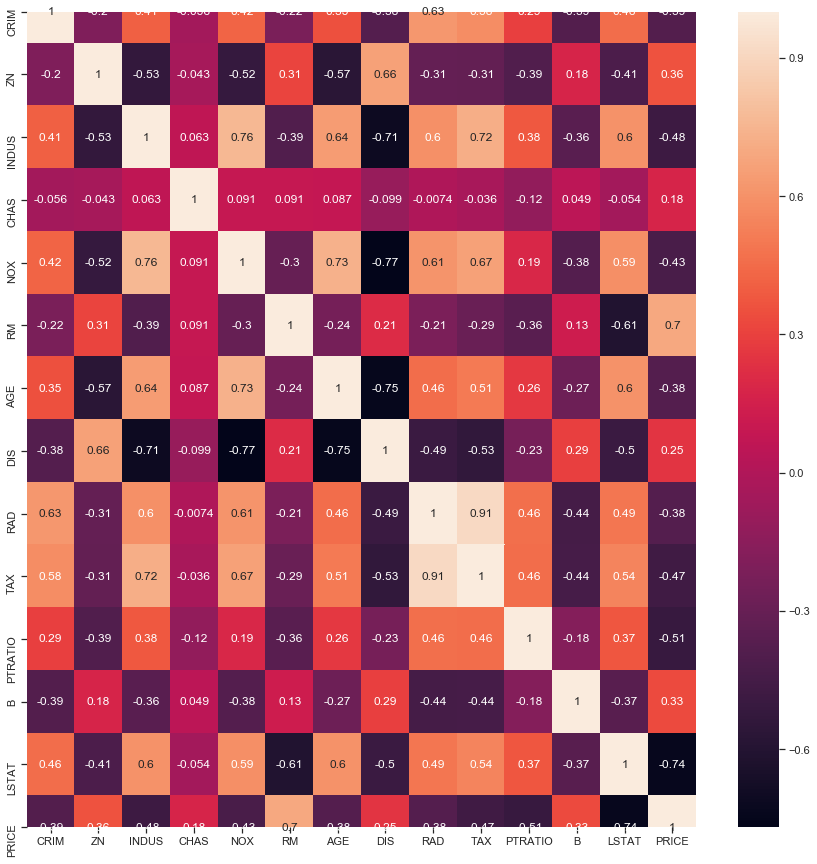

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(bos.corr(), annot=True)


The highest correlated variables (negative and positive) based around Price are LSTAT and RM, the class of the owner, and the number of rooms per house. Meaning that the higher the persons class the more expensive the house, and that the lower the persons clas the less expensive the house. the Positive correlation room count means that the more rooms in a house the more likely it will be expensive, and the less rooms, the less expensive the house.

# Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#75% of the data is used to train the model, 25% to test
X_train, X_test, y_train, y_test = train_test_split(bos[['RM', 'LSTAT']], bos.PRICE, test_size=0.25, random_state=0)

price_regression = LinearRegression()
price_regression.fit(X_train, y_train)

print(price_regression.coef_)
print(price_regression.intercept_)

[ 5.01785312 -0.67451869]
-0.6047107435076953


## Prediction

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
#from the training above, these are the predicted values, and compared to the actual other 25%
prediction = price_regression.predict(X_test)
r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
print(prediction)
print('--------------')
print(r2, mse)

[26.22238591 24.15810116 24.29162097 12.90055111 22.34298929 22.95627108
 21.30247295 23.07555807 15.8231566  24.36450484 15.37806492 18.4858509
 19.21380842  3.66295343 37.24950345 31.52877451 23.47239772 33.20834872
 28.64697119 22.83420112 26.78347886 20.78580578 20.635707   27.07122382
 21.01989488  9.78792173 19.99818966 17.39156262 37.04462243 18.43652607
 18.26913884 19.99342936 23.7900781  21.61507229 25.49218594 18.63893731
 11.38031057 22.88545039 19.35011119 14.05939977 24.35230499 18.88414797
 24.09360396 14.39140912 26.37746202 25.44982334 17.76428279 19.95098846
  4.24117069 26.79642116 20.13385095 15.97498752 21.54892605 38.44994205
 16.60715116 18.34873768 19.64289186 20.44443518 21.46368573 17.6527561
 23.66583644 21.48280248 31.15177894 29.73607265 18.10638829 29.21652911
 20.82988542 17.60023141 20.43563917 21.62344385 22.8284003  24.9073169
 27.80758312 30.77848047 28.04502318  2.90670198 38.11317515 23.73875809
 25.65234309 18.95801673 27.57202425 21.93928563 19.35

## Using StandardScaler

In [55]:
from sklearn.preprocessing import StandardScaler

test_cols = ['RM', 'LSTAT']
std = StandardScaler()
x_std = std.fit_transform(bos[test_cols])
y_std = std.fit_transform(np.array(bos.PRICE).reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.25, random_state=0)

price_std_regression = LinearRegression()
price_std_regression.fit(X_train, y_train)

std_predict = price_std_regression.predict(X_test)
r2_std = r2_score(y_test, std_predict)
mse_std = mean_squared_error(y_test, std_predict)

print(price_std_regression.coef_)
print(price_std_regression.intercept_)
print('--------------')

print(std_predict)
print('--------------')
print(r2_std, mse_std)

[[ 0.38334128 -0.52372784]]
[-0.01489685]
--------------
[[ 0.40156453]
 [ 0.17689299]
 [ 0.19142495]
 [-1.04835036]
 [-0.02065921]
 [ 0.04608884]
 [-0.13390638]
 [ 0.05907173]
 [-0.73026135]
 [ 0.19935745]
 [-0.77870401]
 [-0.44046042]
 [-0.36123136]
 [-2.05374719]
 [ 1.60172819]
 [ 0.97909849]
 [ 0.10226276]
 [ 1.16189911]
 [ 0.66545028]
 [ 0.03280305]
 [ 0.46263248]
 [-0.19013913]
 [-0.2064755 ]
 [ 0.49394991]
 [-0.16466147]
 [-1.38712109]
 [-0.27586128]
 [-0.55956   ]
 [ 1.57942946]
 [-0.44582881]
 [-0.46404681]
 [-0.27637938]
 [ 0.13683829]
 [-0.09988386]
 [ 0.32209141]
 [-0.42379888]
 [-1.21380951]
 [ 0.03838089]
 [-0.34639651]
 [-0.9222242 ]
 [ 0.19802964]
 [-0.39711077]
 [ 0.16987328]
 [-0.88608914]
 [ 0.41844263]
 [ 0.31748077]
 [-0.51899407]
 [-0.28099854]
 [-1.99081548]
 [ 0.46404108]
 [-0.26109625]
 [-0.71373646]
 [-0.10708305]
 [ 1.7323809 ]
 [-0.64493336]
 [-0.45538348]
 [-0.314531  ]
 [-0.22729305]
 [-0.11636039]
 [-0.53113236]
 [ 0.12331614]
 [-0.11427977]
 [ 0.93806724

## Using MinMaxScaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

test_cols = ['RM', 'LSTAT']
mms = MinMaxScaler()
x_std = mms.fit_transform(bos[test_cols])
y_std = mms.fit_transform(np.array(bos.PRICE).reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.25, random_state=0)

price_mms_regression = LinearRegression()
price_mms_regression.fit(X_train, y_train)

mms_predict = price_mms_regression.predict(X_test)
r2_mms = r2_score(y_test, mms_predict)
mse_mms = mean_squared_error(y_test, mms_predict)

print(price_mms_regression.coef_)
print(price_mms_regression.intercept_)
print('--------------')

print(mms_predict)
print('--------------')
print(r2_mms, mse_mms)

[[ 0.58195945 -0.54321239]]
[0.24659882]
--------------
[[ 0.47160858]
 [ 0.42573558]
 [ 0.42870269]
 [ 0.1755678 ]
 [ 0.38539976]
 [ 0.39902825]
 [ 0.36227718]
 [ 0.40167907]
 [ 0.24051459]
 [ 0.43032233]
 [ 0.23062366]
 [ 0.29968558]
 [ 0.31586241]
 [-0.02971215]
 [ 0.71665563]
 [ 0.58952832]
 [ 0.41049773]
 [ 0.62685219]
 [ 0.52548825]
 [ 0.39631558]
 [ 0.48407731]
 [ 0.35079568]
 [ 0.34746016]
 [ 0.49047164]
 [ 0.35599766]
 [ 0.10639826]
 [ 0.3332931 ]
 [ 0.27536806]
 [ 0.71210272]
 [ 0.29858947]
 [ 0.29486975]
 [ 0.33318732]
 [ 0.41755729]
 [ 0.36922383]
 [ 0.45538191]
 [ 0.3030875 ]
 [ 0.14178468]
 [ 0.39745445]
 [ 0.31889136]
 [ 0.20131999]
 [ 0.43005122]
 [ 0.30853662]
 [ 0.42430231]
 [ 0.20869798]
 [ 0.47505471]
 [ 0.45444052]
 [ 0.28365073]
 [ 0.33224419]
 [-0.01686287]
 [ 0.48436491]
 [ 0.3363078 ]
 [ 0.24388861]
 [ 0.36775391]
 [ 0.74333205]
 [ 0.25793669]
 [ 0.29663862]
 [ 0.3253976 ]
 [ 0.34320967]
 [ 0.36585968]
 [ 0.28117236]
 [ 0.41479637]
 [ 0.3662845 ]
 [ 0.58115064]